
#Project Name: GUVICARE
**DATATHAON1.0**

**Date:** 16th & 17th July, 2022

**TeamName:** ZENDS_SQUAD-A

#Description:
An application to predict whether the customer will subscribe to the insurance.

#Problem Statement
In this Classification task, building an ML model that will predict if a client will subscribe to the insurance, based on certain parameters as an input.

#Datasets:
**Input Features:**
- age (numeric)
- job : type of job
- marital : marital status
- educational_qual : education status
- call_type : contact communication type
- day: last contact day of the month (numeric)
- mon: last contact month of year
- dur: last contact duration, in seconds (numeric)
- num_calls: number of contacts performed during this campaign and for this client 
- prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

- y - has the client subscribed to the insurance?(YES/NO)

#Technical Stack :
- Scikit Learn, 
- Numpy Array, Pandas, Matplotlib, pylab etc,.

#ML Algorithms Used:

- RandomForestClassifier
- LogisticRegression
- AdaBoostClassifier
- KNeighborsClassifier
- GaussianNB

#Performance Evaluation:
Below metrics are used to calculate the performance of the model:

- Accuracy score
- ROC AUC score, ROC Curve
- Confusion Matrix

#Conclusion:

Selecting the best model for the problem based on the model performance for the datasets.

In [89]:
#Import required modules for the project
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Collecting Dataset
Since the dataset is huge, adding file to google drive and importing the dataset.
Based on Certain input parameters, we gonna predict whether the customer will opt for th insurance plan


In [90]:
from google.colab import drive
# drive.mount('/content/drive')

#Load & Summarize Dataset
Load Dataset from the directory & Summarize the details such as no. of rows and Columns & Content

In [91]:
df = pd.read_csv("/content/drive/MyDrive/Guvi/Customer_Conversion_Prediction/Customer_Conversion_Prediction.csv")

In [92]:
df.shape

(45211, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [94]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [95]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [96]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


#Data Cleaning
Since there are few text fields in my dataset, performing Data cleaning by using any of below methods

LabelEncoder(Inbuilt function)
Using Map function**( df.Sex = df.Sex.map({"male": 0, "female": 1}))**

In [97]:
#Since our ML model works on numeric data, using LabelEncoder to convert text dataset to numeric
# Let's perform label encoding on all object columns using MAP function
import numpy as np
objList = df.select_dtypes(include = "object").columns
for column1 in objList:
  ordinal_label = {k: i for i, k in enumerate(df[column1].unique(), 0)}
  df[column1] = df[column1].map(ordinal_label).astype(int)

In [98]:
df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

In [99]:
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Since the output class is biased towards one class(NO -> Didn't take insurance) we performing Stratified sampling for training our model

In [100]:
#Segregating Dataset into X & Y
X = df.drop("y",axis=1)   #Feature Matrix
Y = df["y"] 

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
x_train.shape, x_test.shape
#other Ways to handle data imbalance --> SMOTE, ROSE

((36168, 10), (9043, 10))

In [102]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

#Draw heatmap
Draw a heatmap using Pearson Correlation coeffecient

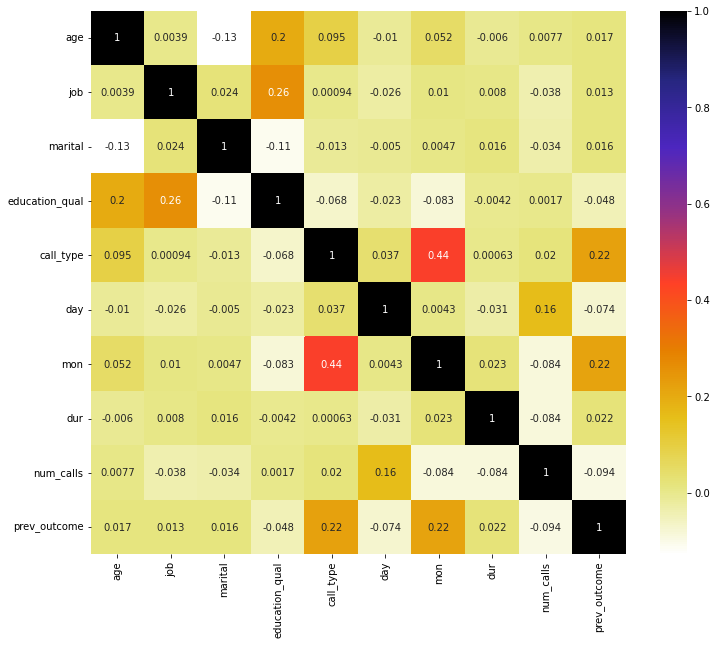

In [103]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr_map = x_train.corr()
sns.heatmap(corr_map, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Function to select highly correlated features it will remove the first feature that is correlated with anything other feature


In [104]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [105]:
corr_features = correlation(x_train, 0.40)
len(set(corr_features))

1

In [106]:
corr_features

{'mon'}

In [107]:
### Used the Variance threshold function to check, if there are any constant columns that can be removed. But there are no constant columns.
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [108]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Guvi/Customer_Conversion_Prediction/Customer_Conversion_Prediction.csv")

In [109]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


From above datasets observation, duration is a continuous variable.
**Dropping in dataset: Duration**, in order to use **mutual_info_classify** for determining the mutual information.

In [110]:
df_mutual_info = x_train.drop("dur", axis=1)
df_mutual_info.describe()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.981697,3.526598,0.513741,1.046726,0.775907,15.792247,2.945781,2.757880,0.290367
std,10.628617,3.104303,0.693359,0.968253,0.549553,8.318688,3.182353,3.077423,0.699303
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,1.000000,16.000000,2.000000,2.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,1.000000,21.000000,5.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,2.000000,31.000000,11.000000,63.000000,3.000000


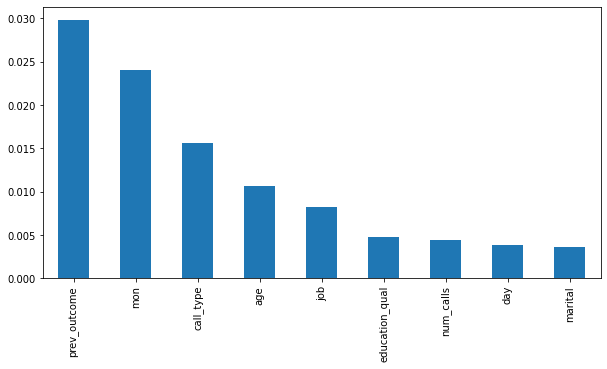

In [111]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df_mutual_info, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_mutual_info.columns
# mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.show()

In [112]:
#No we Will select the  top 5 important features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['age', 'call_type', 'mon', 'dur', 'prev_outcome'], dtype='object')

From EDA and above checks, we see day is not contributing much to the  output. Hence dropping the feature: day

In [113]:
dataset = pd.read_csv("/content/drive/MyDrive/Guvi/Customer_Conversion_Prediction/Customer_Conversion_Prediction.csv")

In [114]:
df_final = dataset.drop("day", axis=1)

In [115]:
df_final

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,nov,508,4,unknown,no


#Label Encoding
Since there are multiclass text features in my dataset, applying OneHotEncoder to convert TEXT --> NUMERIC 

In [116]:
from sklearn.preprocessing import OneHotEncoder
#Map output class(Text) --> Numeric 
df_final["y"] = df_final["y"].map({"no": 0, "yes": 1}).astype(int)
objList = df_final.select_dtypes(include = "object").columns
df_final = pd.get_dummies(df, columns = objList.values)
df_final.columns

Index(['age', 'day', 'dur', 'num_calls', 'y', 'job_0', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_qual_0',
       'education_qual_1', 'education_qual_2', 'education_qual_3',
       'call_type_0', 'call_type_1', 'call_type_2', 'mon_0', 'mon_1', 'mon_2',
       'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8', 'mon_9', 'mon_10',
       'mon_11', 'prev_outcome_0', 'prev_outcome_1', 'prev_outcome_2',
       'prev_outcome_3'],
      dtype='object')

In [117]:
# df_final["y"] = df_final["y"].map({"no": 0, "yes": 1}).astype(int)
df_final

,age,day,dur,num_calls,y,job_0,job_1,job_2,job_3,job_4,...,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,prev_outcome_0,prev_outcome_1,prev_outcome_2,prev_outcome_3
0,58,5,261,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,5,151,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,5,92,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,5,198,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45209,57,17,508,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#Split the dataset into Input & Output


In [118]:
X = df_final.drop("y", axis=1)
Y = df_final["y"]

#Sampling technique --> Stratified
Since the output class is biased towards one class(NO -> Didn't take insurance) we performing Stratified sampling and split the datasets into Train and test for training our model.


In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
x_train.shape, x_test.shape

((36168, 42), (9043, 42))

In [120]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
models_accuracy = []

models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

pred = []
for model in models:
  model.fit(tr_x_train, y_train)
  y_train_pred = model.predict_proba(tr_x_train)
  train_accuracy = roc_auc_score(y_train, y_train_pred[:,-1]) * 100
  y_test_pred = model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy of Model: {} for train: {} %, test: {} %".format(str(model), train_accuracy, test_accuracy))
  models_accuracy.append(test_accuracy)
  pred.append(pd.Series(y_test_pred[:,-1]))

df_models_output = pd.concat(pred, axis=1)
df_models_output.columns = models_name
#Create a dataframe of all the model accuracy for a paricular sample
df_models_output["final_prediction"] = df_models_output.mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, df_models_output["final_prediction"])))

Accuracy of Model: RandomForestClassifier() for train: 100.0 %, test: 92.2748466228621 %
Accuracy of Model: LogisticRegression() for train: 90.43163054254319 %, test: 90.07220532827974 %
Accuracy of Model: AdaBoostClassifier() for train: 90.96712516333064 %, test: 90.34779294352715 %
Accuracy of Model: KNeighborsClassifier() for train: 95.52036745528768 %, test: 81.32538206680057 %
Accuracy of Model: GaussianNB() for train: 81.61175592632821 %, test: 81.24628763998659 %
Ensemble test roc-auc: 0.9089671915560011


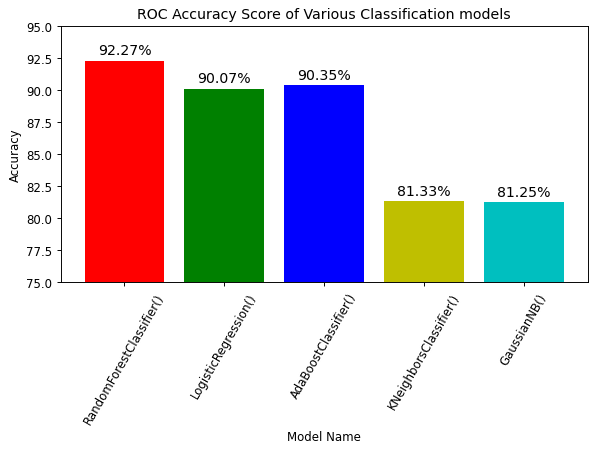

In [122]:
from seaborn import colors
plt.figure(figsize=(8,4), dpi=85)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("ROC Accuracy Score of Various Classification models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.5, s=f"{data.round(2)}%", ha="center", fontsize=12)
plt.ylim(75, 95)
plt.xticks(rotation=60)
plt.show()

#Hyperparameter Tuning
RF classifier is the best model. Performed hyperparameter tuning for the RandomForestClassifier. Below are few observation:
- RandomForestClassifier accuracy: **92.27 %**
- Accuracy for n_estimator=17, min_sample_split=23:
  **92.60%**

In [127]:
from sklearn.ensemble import RandomForestClassifier
for i in range(10,20):
  rf_hyper_model = RandomForestClassifier(random_state = 24, n_jobs = -1, n_estimators=i, max_features=None, min_samples_split=i+6)
  rf_hyper_model.fit(tr_x_train, y_train)
  y_test_hyper = rf_hyper_model.predict(tr_x_test)
  y_test_pred = rf_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimator={}, min_sample_split={} is {} & {}".format(i, i+6, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))

Accuracy for n_estimator=10, min_sample_split=16 is 90.12495853146079 & 92.0995948215759
Accuracy for n_estimator=11, min_sample_split=17 is 90.23554130266504 & 92.25984922107021
Accuracy for n_estimator=12, min_sample_split=18 is 90.31294924250803 & 92.37272035349835
Accuracy for n_estimator=13, min_sample_split=19 is 90.27977441114675 & 92.49274691558962
Accuracy for n_estimator=14, min_sample_split=20 is 90.32400751962845 & 92.5659879760373
Accuracy for n_estimator=15, min_sample_split=21 is 90.33506579674886 & 92.56425386446469
Accuracy for n_estimator=16, min_sample_split=22 is 90.2134247484242 & 92.54851073551188
Accuracy for n_estimator=17, min_sample_split=23 is 90.34612407386929 & 92.60271207947794
Accuracy for n_estimator=18, min_sample_split=24 is 90.35718235098972 & 92.59168005227193
Accuracy for n_estimator=19, min_sample_split=25 is 90.39035718235098 & 92.59411846171875


#Adaboost hyperparameter tuning
Performed hyperparameter tuning for the AdaBoostClassifier. Below are few observation:

- AdaBoostClassifier accuracy: **90.35%**
- Accuracy for n_estimator=101: **90.58%**

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

for i in range(95,105):
  ada_hyper_model = AdaBoostClassifier(n_estimators=i, random_state=0)
  ada_hyper_model.fit(tr_x_train, y_train)
  y_test_hyper = ada_hyper_model.predict(tr_x_test)
  y_test_pred = ada_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimator={} is {} & {}".format(i, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))

Accuracy for n_estimator=95 is 89.88167643481145 & 90.494458536978
Accuracy for n_estimator=96 is 89.89273471193188 & 90.50004557221538
Accuracy for n_estimator=97 is 89.87061815769103 & 90.52344720074146
Accuracy for n_estimator=98 is 89.88167643481145 & 90.5466890305902
Accuracy for n_estimator=99 is 89.91485126617273 & 90.53797704344039
Accuracy for n_estimator=100 is 89.92590954329316 & 90.55278505420728
Accuracy for n_estimator=101 is 89.94802609753401 & 90.58353742189101
Accuracy for n_estimator=102 is 89.94802609753401 & 90.55151850172759
Accuracy for n_estimator=103 is 89.93696782041359 & 90.57418624003182
Accuracy for n_estimator=104 is 89.93696782041359 & 90.56308319119142


#Confusion Matrix
Calculate confusion matrix result for the predicted output to check accuracy of our model

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_model.predict(tr_x_test)
# cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(7742, 243, 624, 434)

In [132]:
df_models_output

,RandomForestClassifier(),LogisticRegression(),AdaBoostClassifier(),KNeighborsClassifier(),GaussianNB(),final_prediction
0,0.04,0.075191,0.481355,0.0,7.647914e-01,0.272268
1,0.00,0.008148,0.479016,0.0,6.959333e-08,0.097433
2,0.00,0.011941,0.469092,0.0,5.659509e-10,0.096207
3,0.00,0.007087,0.457185,0.0,2.928660e-06,0.092855
4,0.02,0.058807,0.475149,0.0,1.630583e-01,0.143403
...,...,...,...,...,...,...
9038,0.37,0.175925,0.494854,0.4,3.486967e-04,0.288226
9039,0.00,0.006735,0.463142,0.0,1.365944e-07,0.093975
9040,0.30,0.081108,0.487477,0.0,2.256759e-01,0.218852
9041,0.09,0.003976,0.458826,0.0,5.545916e-08,0.110560


In [133]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,df_models_output["RandomForestClassifier()"].values)
len(thresholds)

93

In [134]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(df_models_output["final_prediction"].values > thres, 1, 0)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_ls.append(accuracy)

threshold_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
threshold_accuracy.columns = ["Threshold", "Accuracy"]
threshold_accuracy.sort_values(by="Accuracy", ascending=False, inplace=True)
threshold_accuracy.head()

,Threshold,Accuracy
34,0.59,0.901802
33,0.60,0.901581
32,0.61,0.900918
35,0.58,0.900476
41,0.52,0.900476


#Best threshold value for max Accuracy
Based on the ROC score, we can conclude that the Accuracy of the model is maximum at Threshold: 0.59

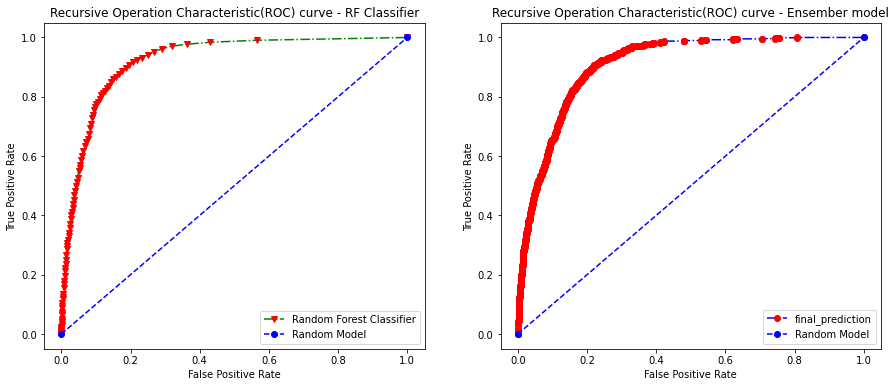

In [135]:
fpr, tpr, threshold = roc_curve(y_test, df_models_output["RandomForestClassifier()"])
fpr_fi, tpr_fi, threshold1 = roc_curve(y_test, df_models_output["final_prediction"])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, "g-.v", mfc="r", mec="r", label="Random Forest Classifier")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - RF Classifier")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fpr_fi, tpr_fi, "b-.o", mfc="r", mec="r", label="final_prediction")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - Ensember model")
plt.show()

In [136]:
models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

models_accuracy = []
for model in models:
  y_pred = model.predict(tr_x_test)
  test_accuracy = accuracy_score(y_test, y_pred) * 100
  print("Accuracy of Model: {} is {} %".format(str(model), test_accuracy))
  models_accuracy.append(test_accuracy)

Accuracy of Model: RandomForestClassifier() is 90.41247373659183 %
Accuracy of Model: LogisticRegression() is 90.06966714585867 %
Accuracy of Model: AdaBoostClassifier() is 89.98120092889528 %
Accuracy of Model: KNeighborsClassifier() is 89.29558774742895 %
Accuracy of Model: GaussianNB() is 86.56419329868406 %


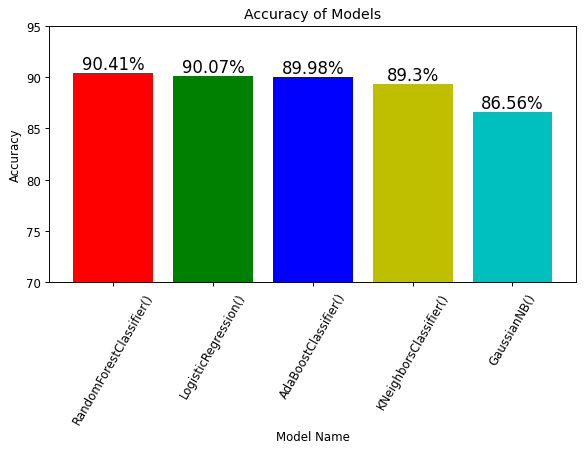

In [137]:
plt.figure(figsize=(8,4), dpi=85)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.ylim(70,95)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.4, s=f"{data.round(2)}%", ha="center", fontsize=14)
plt.xticks(rotation=60)
plt.show()

#Export model to a pickle file for reusing the model for prediction
Based on the Accuracy Score and did hyperparameter tuning  of models. Below is the best accuracy score that we can achieve for models:
- RandomForestClassifier: **92.60%**
- AdaBoostClassifier: **90.58%**

Exporting the RandomForestClassifier, for predicting the output.

In [138]:
#Extract the model to a Pickle file
import pickle
pickle_out = open("rf_model.pkl", "wb")
pickle.dump(rf_hyper_model, pickle_out)
pickle_out.close

<function BufferedWriter.close>

#Conclusion:
Using FLASK API to host the GUVICARE application, which will get input from user and predict whether the customer will opt for insurance or not.